In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/c/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/c/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/c/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/c/house-prices-advanced-regression-techniques/test.csv


In [2]:
# LOADING THE DATA
test = pd.read_csv('/kaggle/input/c/house-prices-advanced-regression-techniques/test.csv')
df = pd.read_csv('/kaggle/input/c/house-prices-advanced-regression-techniques/train.csv')

In [3]:
# EXPLORING THE DATA
# A. SHAPE - (1460, 81)
# 1460 ROWS WITH 81 COLUMNS
df.shape



(1460, 81)

In [4]:
# B. INFORMATION ABOUT THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# C. Displaying the first few rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# D. Finding the null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# SECTION 1: EXPLORATION
This section explores about the data. To its most expensive house price to the depths within the data it has.

## SECTION 1.1 EXTREMETIES

This section finds the most expensive, cheapest and average house price.

In [7]:
# MOST EXPENSIVE HOUSE PRICE
most_expensive = df.loc[df['SalePrice'].idxmax()]
most_expensive # WITH AN Id of 692 has the most expensive house price

Id                  692
MSSubClass           60
MSZoning             RL
LotFrontage       104.0
LotArea           21535
                  ...  
MoSold                1
YrSold             2007
SaleType             WD
SaleCondition    Normal
SalePrice        755000
Name: 691, Length: 81, dtype: object

In [8]:
most_cheap = df.loc[df['SalePrice'].idxmin()]
most_cheap # WITH AN Id of 496 has the cheapest house price

Id                   496
MSSubClass            30
MSZoning         C (all)
LotFrontage         60.0
LotArea             7879
                  ...   
MoSold                11
YrSold              2009
SaleType              WD
SaleCondition    Abnorml
SalePrice          34900
Name: 495, Length: 81, dtype: object

## Section 1.2 Key Statistics
This section further elaborate key exploration using some statistical methods.

In [9]:
# AVERAGE HOUSE PRICE
average_price = df['SalePrice'].mean()
round(average_price, 2) # THE AVERAGE PRICE IS 180K DOLLARS!

np.float64(180921.2)

In [10]:
#  MEDIAN OF HOUSE PRICE
median_price = df['SalePrice'].median()
median_price

163000.0

In [11]:
# FINDING OUT THE AVERAGE NUMBER OF BEDROOMS PRESENT IN A HOUSE
bedroom = df['BedroomAbvGr'].mean()
round(bedroom) # WITHOUT ROUND IT IS 2.84

3

In [12]:
# FINDING OUT THE AVERAGE GROUND LIVING AREA IN SQUARE FEET
glivarea = df['GrLivArea'].mean()
glivarea # 1515 sq. ft.!!

np.float64(1515.463698630137)

In [13]:
house_price_std = df['SalePrice'].std()
house_price_std

79442.50288288663

In [14]:
# QUANTILE AND INTERQUARTILE RANGE
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# WHISKERS
# LOWER WHISKER
lw_whisker = Q1 - 1.5 * IQR
# HIGHER WHISKER
hg_whisker = Q3 + 1.5 * IQR
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Whisker: {lw_whisker}, \
High Whisker: {hg_whisker}") 
# Q1:129975.0, Q3:214000.0, IQR: 84025.0
# Lower Whisker: 3937.5, High Whisker: 340037.5


Q1: 129975.0, Q3: 214000.0, IQR: 84025.0, Lower Whisker: 3937.5, High Whisker: 340037.5


In [15]:
# GETTING SUMMARY STATISTICS
describe = df.describe()
describe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# SECTION 2: BASIC VISUALIZATION


## SECTION 2.1: HISTOGRAMS

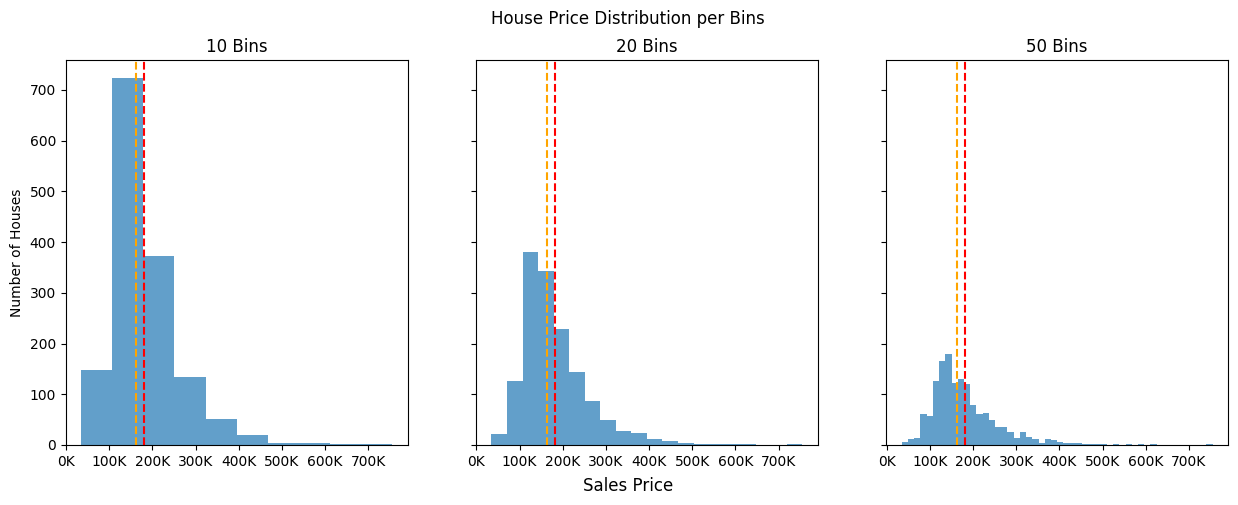

In [16]:
from matplotlib.ticker import FuncFormatter, MultipleLocator

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex= True, sharey=True)

for a in ax:
    a.xaxis.set_major_locator(MultipleLocator(100_000))
    a.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000)}K"))

axes = ax
num_bins = 10, 20, 50
bin_labels = ['10 Bins', '20 Bins', '50 Bins']

for a, n_bins, b_labels in zip(axes, num_bins, bin_labels):
    a.hist(x=df['SalePrice'], bins = n_bins, label = b_labels, alpha=0.7)
    a.set_title(b_labels)
    a.axvline(average_price, color = 'red', linestyle ='--', label =f"Mean {b_labels}")
    a.axvline(median_price, color = 'orange', linestyle ='--', label =f"Median {b_labels}")


fig.suptitle('House Price Distribution per Bins')
fig.supxlabel('Sales Price')
ax[0].set_ylabel('Number of Houses')
plt.show()

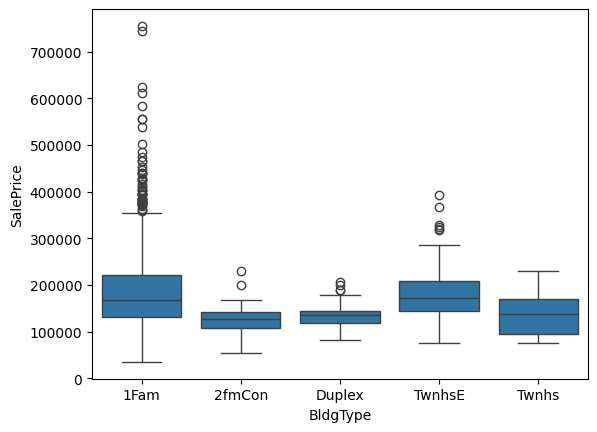

In [17]:
sns.boxplot(x=df['BldgType'],y=df['SalePrice'])
plt.show()

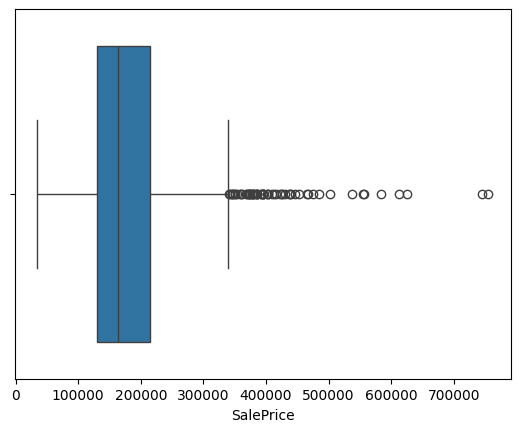

In [18]:
sns.boxplot(x=df['SalePrice'])
plt.show()